In [2]:
from climlab.solar.insolation import daily_insolation
import numpy as np
import matplotlib.pyplot as plt
Lat=np.linspace(-90,90,18)
x=np.linspace(0,60*60*24*365,101)
sol=daily_insolation(Lat,x/60/60/24)#%365)
#int(x/xconv)%365

[  0.     3.65   7.3   10.95  14.6   18.25  21.9   25.55  29.2   32.85
  36.5   40.15  43.8   47.45  51.1   54.75  58.4   62.05  65.7   69.35
  73.    76.65  80.3   83.95  87.6   91.25  94.9   98.55 102.2  105.85
 109.5  113.15 116.8  120.45 124.1  127.75 131.4  135.05 138.7  142.35
 146.   149.65 153.3  156.95 160.6  164.25 167.9  171.55 175.2  178.85
 182.5  186.15 189.8  193.45 197.1  200.75 204.4  208.05 211.7  215.35
 219.   222.65 226.3  229.95 233.6  237.25 240.9  244.55 248.2  251.85
 255.5  259.15 262.8  266.45 270.1  273.75 277.4  281.05 284.7  288.35
 292.   295.65 299.3  302.95 306.6  310.25 313.9  317.55 321.2  324.85
 328.5  332.15 335.8  339.45 343.1  346.75 350.4  354.05 357.7  361.35
   0.  ]


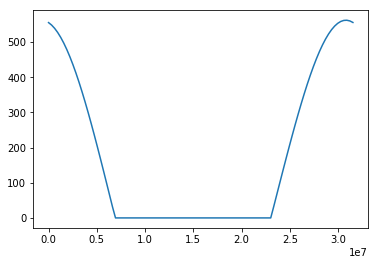

In [2]:
print(x/(60*60*24)%365)
plt.plot(x,sol[0])

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars
#from lowEBMs.Packages.Functions import asd

In [14]:
configdic=importer('Development_config_1.ini')

variable_importer(configdic,False)

eq=configdic['eqparam']
rk=configdic['rk4input']
fun=configdic['funccomp']

outputdata=rk4alg(model_equation,eq,fun)

Loading Configuration from: Development_config_1.ini
0D
Starting simulation...
Simulation finished within 73.7575466632843 seconds


(0, 200)

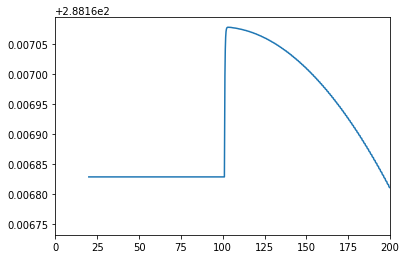

In [16]:
plt.plot(np.array(outputdata[0][(365*5):])/(60*60*24*365*10),outputdata[2][(365*5):])#,Vars.Read['solar'])
#print(Vars.solar)
#plt.ylim(341.85,341.86)
#plt.xlim(0,200)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars
#from lowEBMs.Packages.Functions import asd

In [4]:
configdic=importer('Development_config_2.ini')

variable_importer(configdic,False)

eq=configdic['eqparam']
rk=configdic['rk4input']
fun=configdic['funccomp']

outputdata=rk4alg(model_equation,eq,fun)

Loading Configuration from: Development_config_2.ini
0D
Starting simulation...
Simulation finished within 33.98644542694092 seconds


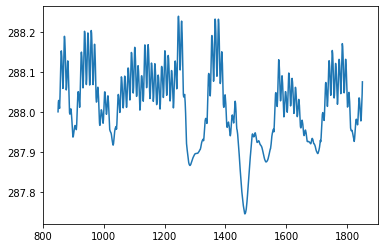

In [5]:
plt.plot(np.array(outputdata[0])/(60*60*24*365),outputdata[2])
#print(Vars.solar)
#print(Vars.ExternalInput[0][0]/(60*60*24*365))

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg, controlrun
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars

In [4]:
configVKCTRL=importer('../../Simulations/Config/Controls/TSI_VieiraKrivova_850_1850_CTRL.ini')
variable_importer(configVKCTRL,True,accuracy_number=1000,accuracy=1e-3)
CTRLVK=np.array(controlrun(configVKCTRL))

Loading Configuration from: ../../Simulations/Config/Controls/TSI_VieiraKrivova_850_1850_CTRL.ini
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.
0D
Starting simulation...
Steady State reached after 1001 steps, within 0.10100722312927246 seconds
Simulation finished within 0.10122227668762207 seconds
Finished controlrun over 852.7424657534247 years. Runtime: 0.10125970840454102 s


In [5]:
configVK=importer('TSI_VieiraKrivova_850_1850_new.ini')
variable_importer(configVK,False)
Vars.T,Vars.T_global=CTRLVK[1:,-1]
VK_time,VK_ZMT,VK_GMT=rk4alg(model_equation,configVK['eqparam'],configVK['funccomp'])

Loading Configuration from: ../../Simulations/Config/TSI_VieiraKrivova_850_1850.ini
0D
Starting simulation...


OSError: ../Forcings/TSI/tsi_VK.txt not found.

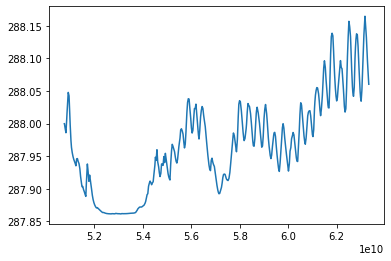